In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Data

In [2]:
data = pd.read_csv('C:/Users/Lenovo/Downloads/archive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing
Dropping the Time Cloumn

In [3]:
data = data.drop("Time", axis=1)

Cheking for any missing values

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


we are trying to predict the Credit risk baased on various variables, here the Class variable represents the value 1 in case of fraud and 0 otherwise.

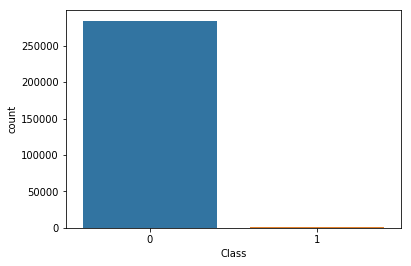

In [6]:
sns.countplot(x="Class", data=data)
plt.show()

As you can see that there is huge data imbalance in the dependent variable 'Class', we try to downsample the dependent variables

In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler

In [8]:
under_sampler = RandomUnderSampler(sampling_strategy = .50)

In [9]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [10]:
X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
X_under, y_under = under_sampler.fit_resample(X, Y)

In [12]:
from pandas import DataFrame
test = pd.DataFrame(y_under, columns = ['Class'])

In [13]:
test.shape

(1476, 1)

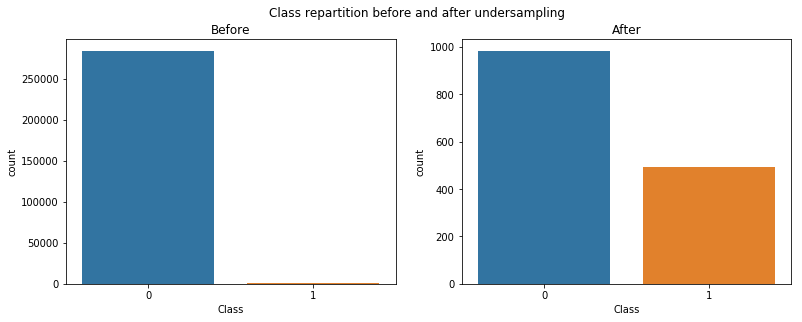

In [14]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=data, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_under, test, random_state=25, test_size= 0.25)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [17]:
sc_x = StandardScaler()

In [18]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

# Lgistic Regression for predicting Credit Fraud

In [19]:
log_model = LogisticRegression(random_state = 2)
log_model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=2)

In [20]:
log_y_pred = log_model.predict(X_test)

Validating the Predicted values and Checking the Model Performace

In [21]:
from sklearn import metrics 

In [22]:
log_cm = metrics.confusion_matrix(y_test, log_y_pred)
print(log_cm)

[[238   5]
 [ 18 108]]


In [23]:
log_classification_report = metrics.classification_report(y_test, log_y_pred)
print('Log Classification Report',log_classification_report)

Log Classification Report               precision    recall  f1-score   support

           0       0.93      0.98      0.95       243
           1       0.96      0.86      0.90       126

    accuracy                           0.94       369
   macro avg       0.94      0.92      0.93       369
weighted avg       0.94      0.94      0.94       369



In [24]:
print("Accuracy Logit:",metrics.accuracy_score(y_test, log_y_pred)*100)
print("Precision Logit:",metrics.precision_score(y_test, log_y_pred)*100)
print("Recall Logit:",metrics.recall_score(y_test, log_y_pred)*100)
print("F1 Score Logit:",metrics.f1_score(y_test, log_y_pred)*100)

Accuracy Logit: 93.76693766937669
Precision Logit: 95.57522123893806
Recall Logit: 85.71428571428571
F1 Score Logit: 90.3765690376569


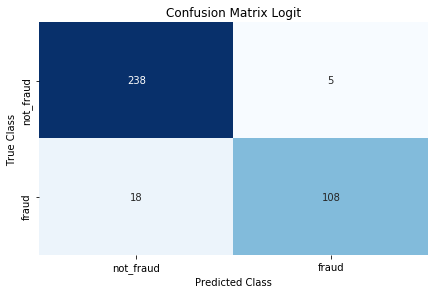

In [25]:
matrix_logit = metrics.confusion_matrix(y_test, log_y_pred)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [26]:
y_pred_logit_proba = log_model.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
log_auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", log_auc_logit*100)

AUC Logistic Regression : 96.71108498268993


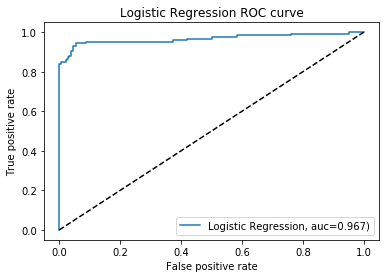

In [27]:
#ROC
plt.plot(fpr_logit,tpr_logit, label="Logistic Regression, auc={:.3f})".format(log_auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

# Neural Network for Predicting the Credit Risk

In [28]:
from tensorflow.keras import layers, Sequential

In [29]:
model = Sequential()
model.add(layers.Dense(50, input_dim=29, activation='relu'))
model.add(layers.Dense(29, activation='relu'))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dropout(.20))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1500      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1479      
_________________________________________________________________
dense_2 (Dense)              (None, 14)                420       
_________________________________________________________________
dropout (Dropout)            (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 3,414
Trainable params: 3,414
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(X_under, test, epochs=200, batch_size=10)

Epoch 1/200
148/148 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.7547
Epoch 2/200
148/148 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8977
Epoch 3/200
148/148 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.9262
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9322
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9336
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9411
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.9431
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9417
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9390
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 0.2202 - accura

In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


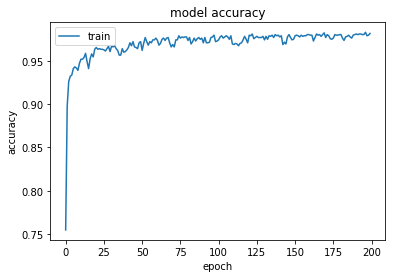

In [34]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

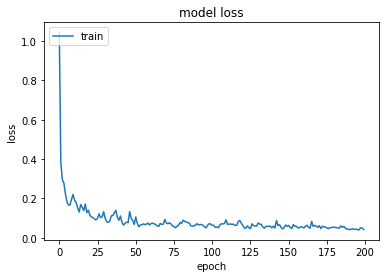

In [35]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
neural_y_pred = model.predict(X_test)

In [37]:
neural_cm = metrics.confusion_matrix(y_test, neural_y_pred.round(), normalize=None)

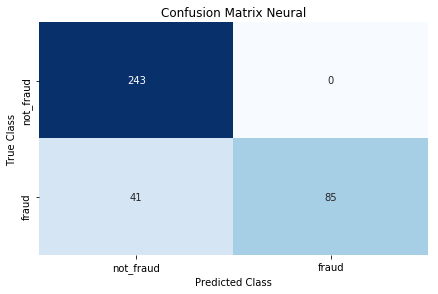

In [38]:
cm_neural = pd.DataFrame(neural_cm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_neural, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [39]:
print("Accuracy Neural:",metrics.accuracy_score(y_test, neural_y_pred.round())*100)
print("Precision Neural:",metrics.precision_score(y_test, neural_y_pred.round())*100)
print("Recall Neural:",metrics.recall_score(y_test, neural_y_pred.round())*100)
print("F1 Score Neural:",metrics.f1_score(y_test, neural_y_pred.round())*100)

Accuracy Neural: 88.88888888888889
Precision Neural: 100.0
Recall Neural: 67.46031746031747
F1 Score Neural: 80.56872037914692


W0412 20:05:36.894040  4568 deprecation.py:323] From <ipython-input-40-b57c52082745>:1: Sequential.predict_proba (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use `model.predict()` instead.


AUC Logistic Regression : 92.968188647201


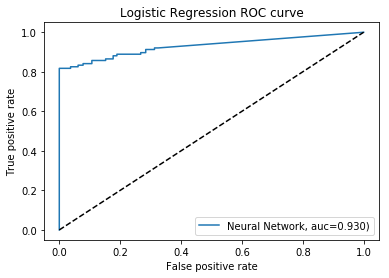

In [40]:
y_pred_Neural_proba = model.predict_proba(X_test)
Neural_fpr_logit, Neural_tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_Neural_proba)
Neural_auc_logit = metrics.roc_auc_score(y_test, y_pred_Neural_proba)
print("AUC Logistic Regression :", Neural_auc_logit*100)

#ROC
plt.plot(Neural_fpr_logit,Neural_tpr_logit, label="Neural Network, auc={:.3f})".format(Neural_auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

# SVM Classifier for Predicting Credit Risk

In [49]:
from sklearn.svm import SVC
sv_classifier = SVC(kernel = 'linear', random_state=0, probability=True)
sv_classifier.fit(X_under, test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', probability=True, random_state=0)

In [50]:
sv_pred = sv_classifier.predict(X_test)

In [51]:
from sklearn import metrics 

sv_cm = metrics.confusion_matrix(y_test, sv_pred)
print(sv_cm)

[[243   0]
 [ 78  48]]


In [52]:
sv_classification_report = metrics.classification_report(y_test, sv_pred)
print('Log Classification Report',sv_classification_report)

Log Classification Report               precision    recall  f1-score   support

           0       0.76      1.00      0.86       243
           1       1.00      0.38      0.55       126

    accuracy                           0.79       369
   macro avg       0.88      0.69      0.71       369
weighted avg       0.84      0.79      0.76       369



In [53]:
print("Accuracy SVM:",metrics.accuracy_score(y_test, sv_pred)*100)
print("Precision SVM:",metrics.precision_score(y_test, sv_pred)*100)
print("Recall SVM:",metrics.recall_score(y_test, sv_pred)*100)
print("F1 Score SVM:",metrics.f1_score(y_test, sv_pred)*100)

Accuracy SVM: 78.86178861788618
Precision SVM: 100.0
Recall SVM: 38.095238095238095
F1 Score SVM: 55.172413793103445


In [54]:
matrix_sv = metrics.confusion_matrix(y_test, sv_pred)
cm_sv = pd.DataFrame(matrix_sv, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

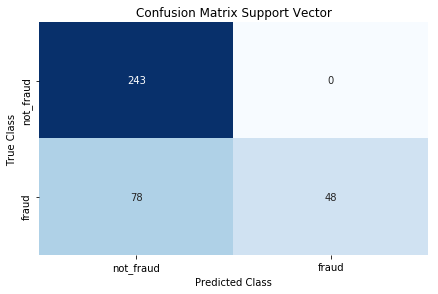

In [55]:
sns.heatmap(cm_sv, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Support Vector"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [57]:
y_pred_sv_proba = sv_classifier.predict_proba(X_test)[::,1]
sv_fpr_logit, sv_tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_sv_proba)
log_auc_sv = metrics.roc_auc_score(y_test, y_pred_sv_proba)
print("AUC Logistic Regression :", log_auc_sv*100)

AUC Logistic Regression : 94.20275654843556


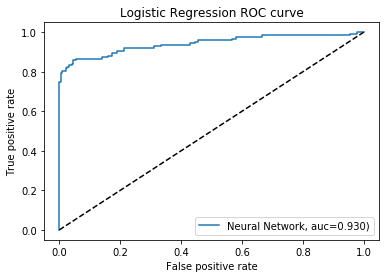

In [58]:
plt.plot(sv_fpr_logit,sv_tpr_logit, label="Neural Network, auc={:.3f})".format(Neural_auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()